In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.style.use('seaborn-colorblind')

## Read in Excel files of data and question labels
XLS = pd.ExcelFile('../../ComputationSurveyData/LabeledComputationDataColumnRenamed.xlsx')
XLS2 = pd.ExcelFile('../../ComputationSurveyData/Questions.xlsx')

## Parse the appropriate sheets into dataframes
df = XLS.parse('LabeledComputationData')
questions = XLS2.parse('Sheet1')

outDir = "/Users/caballero/Repos/research/papers/2017_CompSurvey/figs/"

bboxprops = {'facecolor':'white', 'pad':0.5, 'boxstyle':'round', 'edgecolor':'lightgrey', 'alpha':0.7}

Number of Unique Schools:  357
Number of Schools with at least one computational teacher:  Q1    263
dtype: int64
Number of Schools with at least fifty percent computational teacher:  Q1    195
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


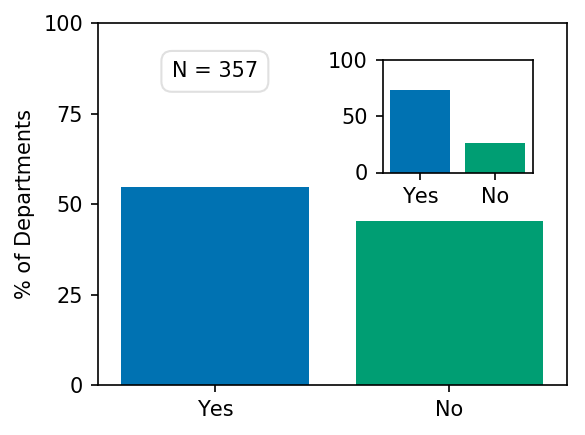

In [125]:
## Teaching Computation at all

question = 'Q1'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithOneTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()
numberOfUniqueSchools = df['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneTeacher)
print('Number of Schools with at least fifty percent computational teacher: ', numberOfSchoolsWithFiftyPercent)

atLeastOne = numberOfSchoolsWithOneTeacher/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercent/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.65, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'FiftyPercentWInset.pdf')

In [120]:
qBySchool = df[['NAME','Q11']]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool['Q11'] > 0) & (qBySchool['Q11'] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)
qFrac.head(n=10)

,Q11
NAME,
Alabama A & M University,0.000000
Albright College,1.000000
Alfred University,1.000000
Allan Hancock College,0.000000
Allegany College of Maryland,0.000000
Amarillo College,0.000000
American University,0.750000
Amherst College,0.666667
Andrews University,1.000000


In [123]:
qFrac[qFrac > 0.5].count()

Q11    100
dtype: int64

Number of Unique Schools:  357
Number of Schools with at least one computational teacher:  Q8    191
dtype: int64
Number of Schools with at least fifty percent computational teacher:  Q8    85
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


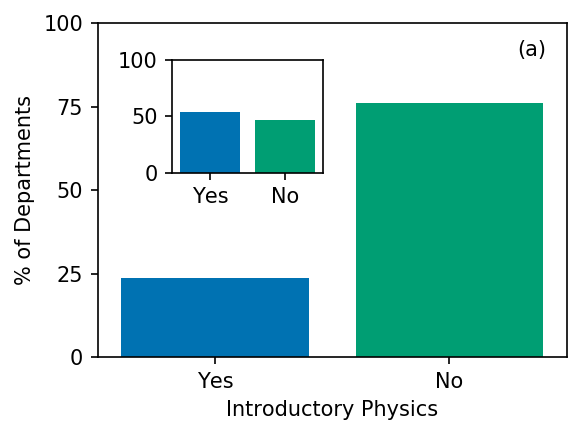

In [137]:
## Teaching computaiton in Intro Physics

question = 'Q8'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithOneIntroTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercentIntro = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = df['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneIntroTeacher)
print('Number of Schools with at least fifty percent computational teacher: ', numberOfSchoolsWithFiftyPercentIntro)

atLeastOne = numberOfSchoolsWithOneIntroTeacher/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercentIntro/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel('Introductory Physics')
# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])

ax1.text(1.35, 90, '(a)', ha='center')
# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

plt.tight_layout()
plt.savefig(outDir + 'FiftyPercentWInsetIntro.pdf')

Number of Unique Schools:  357
Number of Schools with at least one computational teacher:  Q11    184
dtype: int64
Number of Schools with at least fifty percent computational teacher:  Q11    100
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


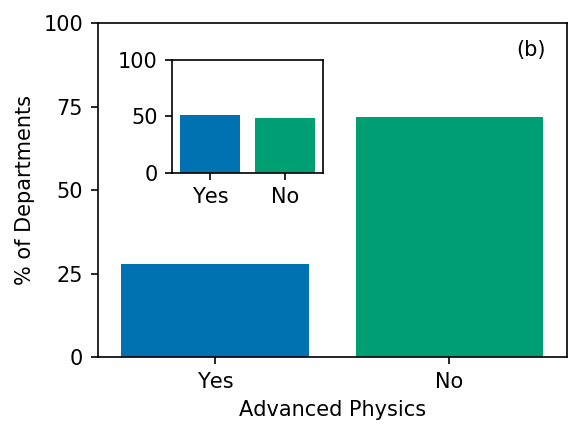

In [140]:
## Teaching computaiton in Advanced Physics

question = 'Q11'
qBySchool = df[['NAME', question]]

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithOneIntroTeacher = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercentIntro = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = df['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one computational teacher: ', numberOfSchoolsWithOneIntroTeacher)
print('Number of Schools with at least fifty percent computational teacher: ', numberOfSchoolsWithFiftyPercentIntro)

atLeastOne = numberOfSchoolsWithOneIntroTeacher/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercentIntro/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel('Advanced Physics')

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.6, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

ax1.text(1.35, 90, '(b)', ha='center')

plt.tight_layout()
plt.savefig(outDir + 'FiftyPercentWInsetAdvanced.pdf')

In [157]:
## Get only YES folks
onlyYesDF = df.loc[df['Q1'] == 1]

Number of Unique Schools:  263
Number of Schools with at least one:  Q34    96
dtype: int64
Number of Schools with at least fifty percent:  Q34    38
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


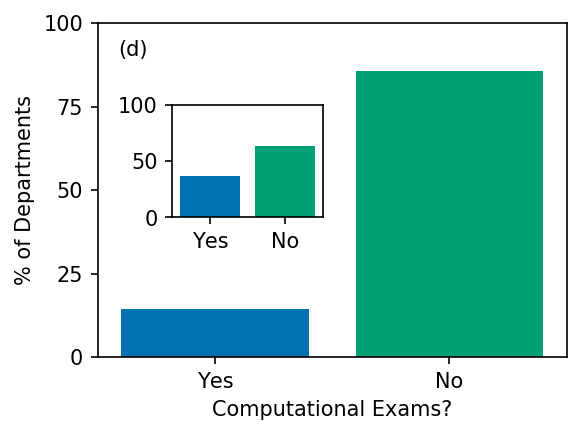

In [158]:
## Comp on Exams?

question = 'Q34'
label = 'Computational Exams?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(d)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOne = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercent/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel(label)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.5, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

ax1.text(-0.35, 90, subplot, ha='center')

plt.tight_layout()
plt.savefig(outDir + 'CompExams.pdf')

Number of Unique Schools:  263
Number of Schools with at least one:  Q32    182
dtype: int64
Number of Schools with at least fifty percent:  Q32    106
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


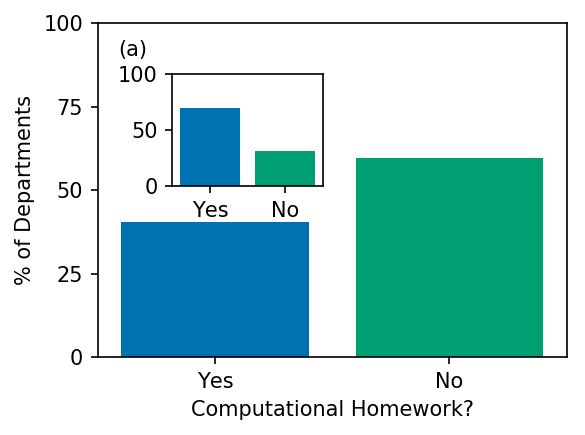

In [167]:
## Comp on Exams?

question = 'Q32'
label = 'Computational Homework?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(a)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOne = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercent/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel(label)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.57, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

ax1.text(-0.35, 90, subplot, ha='center')

plt.tight_layout()
plt.savefig(outDir + 'CompHW.pdf')

Number of Unique Schools:  263
Number of Schools with at least one:  Q38    170
dtype: int64
Number of Schools with at least fifty percent:  Q38    98
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


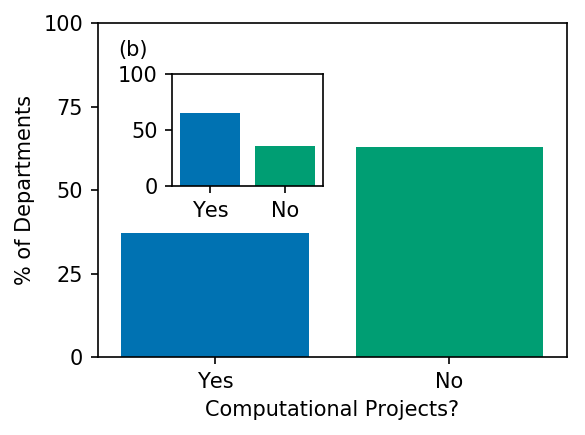

In [168]:
## Comp Projs?

question = 'Q38'
label = 'Computational Projects?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(b)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOne = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercent/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel(label)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.57, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

ax1.text(-0.35, 90, subplot, ha='center')

plt.tight_layout()
plt.savefig(outDir + 'CompProj.pdf')

Number of Unique Schools:  263
Number of Schools with at least one:  Q33    104
dtype: int64
Number of Schools with at least fifty percent:  Q33    34
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


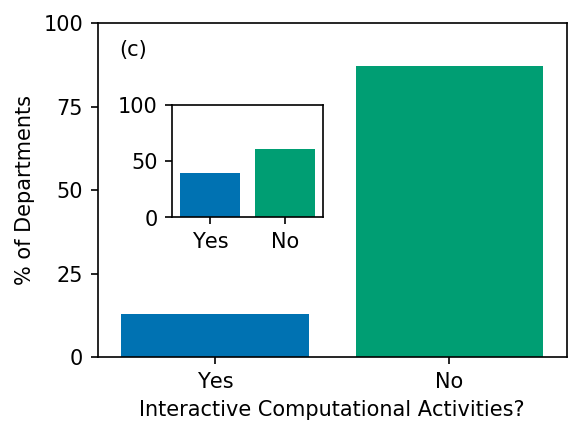

In [160]:
## Comp IE?

question = 'Q33'
label = 'Interactive Computational Activities?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(c)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOne = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercent/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel(label)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.5, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

ax1.text(-0.35, 90, subplot, ha='center')

plt.tight_layout()
plt.savefig(outDir + 'CompIE.pdf')

Number of Unique Schools:  263
Number of Schools with at least one:  Q2    47
dtype: int64
Number of Schools with at least fifty percent:  Q2    14
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


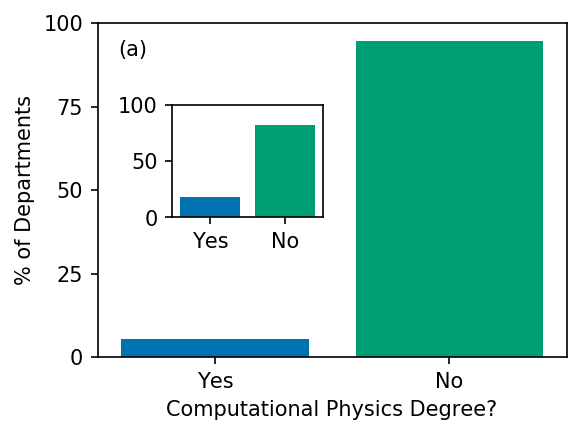

In [161]:
## Comp Degree?

question = 'Q2'
label = 'Computational Physics Degree?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(a)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOne = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercent/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel(label)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.5, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

ax1.text(-0.35, 90, subplot, ha='center')

plt.tight_layout()
plt.savefig(outDir + 'DegreeinComp.pdf')

Number of Unique Schools:  263
Number of Schools with at least one:  Q3    21
dtype: int64
Number of Schools with at least fifty percent:  Q3    5
dtype: int64


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


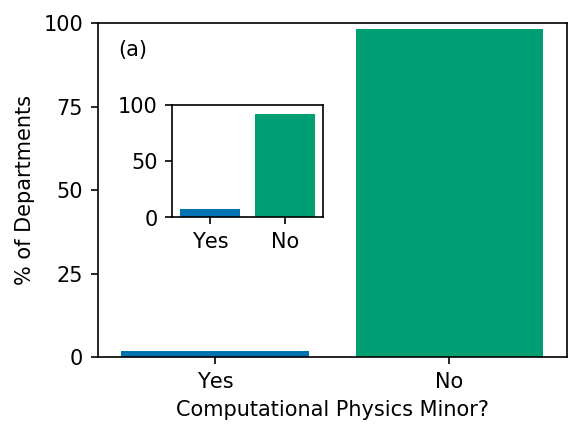

In [163]:
## Comp IE?

question = 'Q3'
label = 'Computational Physics Minor?'
qBySchool = onlyYesDF[['NAME', question]]
subplot = '(a)'

qTot = qBySchool.groupby(['NAME']).count()
qYes = qBySchool[(qBySchool[question] > 0) & (qBySchool[question] <= 1)].groupby(['NAME']).sum()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

numberOfSchoolsWithAtLeastOne = qFrac[qFrac > 0].count()
numberOfSchoolsWithFiftyPercent = qFrac[qFrac > 0.5].count()

numberOfUniqueSchools = onlyYesDF['NAME'].nunique()

print('Number of Unique Schools: ', numberOfUniqueSchools)
print('Number of Schools with at least one: ', numberOfSchoolsWithAtLeastOne)
print('Number of Schools with at least fifty percent: ', numberOfSchoolsWithFiftyPercent)

atLeastOne = numberOfSchoolsWithAtLeastOne/numberOfUniqueSchools*100
atLeastFifty = numberOfSchoolsWithFiftyPercent/numberOfUniqueSchools*100

fig, ax1 = plt.subplots(figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

ax1.bar([0],[atLeastFifty])
ax1.bar([1],[100-atLeastFifty])
ax1.axis([-.5,1.5,0,100])

plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.yticks([0,25,50,75,100])
plt.xlabel(label)

# These are in unitless percentages of the figure size. (0,0 is bottom left)
left, bottom, width, height = [0.30, 0.5, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])

#fig3 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
#ax3 = fig3.add_subplot(111)

ax2.bar([0],[atLeastOne])
ax2.bar([1],[100-atLeastOne])
ax2.axis([-.5,1.5,0,100])
plt.xticks([0,1],['Yes','No'])


# plt.xticks([0,1],['Yes','No'])
# plt.title('Does at least one person in\nyour department teach computing?')

#ax1.text(0, 85, 'N = 357', bbox = bboxprops, ha='center')

# Ystring = 'N = '+  str(numberOfSchoolsWithOneTeacher)
# ax3.text(-0.20, 10, Ystring, bbox=bboxprops)
# Nstring = 'N = '+  str(numberOfUniqueSchools-numberOfSchoolsWithOneTeacher)
# ax3.text(0.85, 10, Nstring, bbox=bboxprops)

ax1.text(-0.35, 90, subplot, ha='center')

plt.tight_layout()
plt.savefig(outDir + 'MinorinComp.pdf')

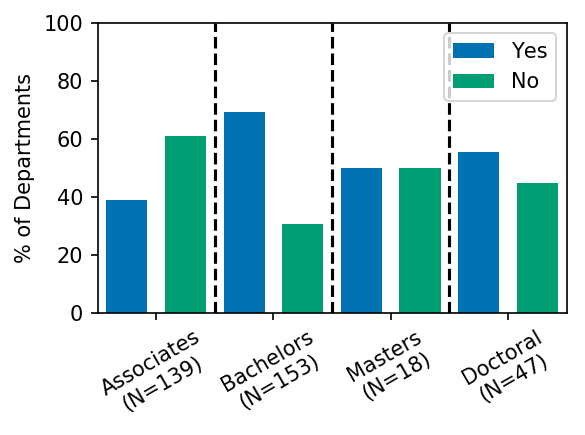

In [261]:
df.head()
question = 'Q1'
qBySchoolByDegree = df[['NAME', 'Phy.Degfact', question]]

qTot = qBySchoolByDegree.groupby(['NAME', 'Phy.Degfact']).count()
qYes = qBySchoolByDegree[(qBySchoolByDegree[question] > 0) &
                             (qBySchoolByDegree[question] <= 1)].groupby(['NAME', 'Phy.Degfact']).count()

totProg = qTot.groupby(['Phy.Degfact']).count()

qFrac = qYes/qTot
qFrac = qFrac.fillna(value=0)

qFrac.head(n=10)

schoolsWithOne = qFrac[(qFrac[question] > 0)]
schoolsWithFiftyP = qFrac[qFrac[question] > 0.5]

withOne = schoolsWithOne.groupby(['Phy.Degfact']).count()
withFiftyP = schoolsWithFiftyP.groupby(['Phy.Degfact']).count()

onefrac = withOne/totProg*100
fiftyfrac = withFiftyP/totProg*100

#onefrac.head()
fig = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

plt.bar(np.arange(0,8,2), fiftyfrac[question].tolist(), width=0.7)
plt.bar(np.arange(1,8,2), (100-fiftyfrac[question]).tolist(), width=0.7)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),
           ['Associates\n(N=139)','Bachelors\n(N=153)','Masters\n(N=18)','Doctoral\n(N=47)'],
           rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.tight_layout()

plt.plot([1.5, 1.5],[0, 100], '--k')
plt.plot([3.5, 3.5],[0, 100], '--k')
plt.plot([5.5, 5.5],[0, 100], '--k')


plt.savefig(outDir + '50PercentByDegree.pdf')
# fig2 = plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

# plt.bar(np.arange(0,8,2), onefrac[question].tolist(), width=0.7)
# plt.bar(np.arange(1,8,2), (100-onefrac[question]).tolist(), width=0.7)
# plt.ylabel('% of Departments')
# plt.xticks(np.arange(0.5,8,2),
#            ['Associates\n(N=139)','Bachelors\n(N=153)','Masters\n(N=18)','Doctoral\n(N=47)'],
#            rotation=30)
# plt.axis([-.5,7.5,0,100])
# plt.legend(['Yes','No'])
# plt.tight_layout()

In [268]:
from scipy.stats import chi2_contingency

chi2_contingency([withFiftyP[question],totProg[question]-withFiftyP[question]])

(27.380755222457182,
 4.8986781432252924e-06,
 3,
 array([[ 75.92436975,  83.57142857,   9.83193277,  25.67226891],
        [ 63.07563025,  69.42857143,   8.16806723,  21.32773109]]))

In [271]:
chi2_contingency([withFiftyP[question][1:3],totProg[question][1:3]-withFiftyP[question][1:3]])

(1.9135584124954335,
 0.16656851962552666,
 1,
 array([[ 102.89473684,   12.10526316],
        [  50.10526316,    5.89473684]]))

In [272]:
chi2_contingency([withFiftyP[question][2:4],totProg[question][2:4]-withFiftyP[question][2:4]])

(0.011433355848249442,
 0.91484699502622435,
 1,
 array([[  9.69230769,  25.30769231],
        [  8.30769231,  21.69230769]]))

In [275]:
chi2_contingency([withFiftyP[question][1:4:2],totProg[question][1:4:2]-withFiftyP[question][1:4:2]])

(2.5321808727536474, 0.11154595132194085, 1, array([[ 100.98,   31.02],
        [  52.02,   15.98]]))